# Programming exercise 5: Regularized linear regression and bias versus variance
Here are my solutions for this exercise. Jupyter notebook template modified from: https://github.com/dibgerge/ml-coursera-python-assignments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io as sio

## 1 Regularized linear regression

Implementation of regularized linear regression to predict the amount of water flowing out a dam.

In [2]:
# Load dataset
data = sio.loadmat('ex5data1.mat')
X, y = data['X'], data['y'] # Training set
X_val, y_val = data['Xval'], data['yval'] # Cross validation set
X_test, y_test = data['Xtest'], data['ytest'] # Test set

print (f'Data set: \tShape:')
print (f'X: \t\t{X.shape}\ny: \t\t{y.shape}')
print (f'X_val: \t\t{X_val.shape}\ny_val: \t\t{y_val.shape}')
print (f'X_test: \t{X_test.shape}\ny_test: \t{y_test.shape}')

Data set: 	Shape:
X: 		(12, 1)
y: 		(12, 1)
X_val: 		(21, 1)
y_val: 		(21, 1)
X_test: 	(21, 1)
y_test: 	(21, 1)


In [3]:
# Add bias terms to X data
X = np.concatenate([np.ones((len(X), 1)), X], axis=1)
X_val = np.concatenate([np.ones((len(X_val), 1)), X_val], axis=1)
X_test = np.concatenate([np.ones((len(X_test), 1)), X_test], axis=1)

print (f'Data set: \tShape:')
print (f'X: \t\t{X.shape}')
print (f'X_val: \t\t{X_val.shape}')
print (f'X_test: \t{X_test.shape}')

Data set: 	Shape:
X: 		(12, 2)
X_val: 		(21, 2)
X_test: 	(21, 2)


### 1.1 Visualizing the data set

In [4]:
def plot_data(X, y):
    """
    Plots the data points X and y into a new figure.
    PLOTDATA(x,y) plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a m x 2 matrix.
    
    Parameters
    ----------
    X : np.array
        The input dataset of shape (m x 1), where m is the 
        number of examples, and n is the number of features.
        
    y : np.array
    The input dataset of shape (m x 1), where m is the 
    number of examples, and n is the number of features.

    Returns
    -------
    fig : matplotlib.pyplot object
        Scatter plot of X versus y
    """
    
    plt.scatter(X[:, 1: ], y, color='cornflowerblue')
    plt.xlabel('Change in water level')
    plt.ylabel('Water flowing out of dam')

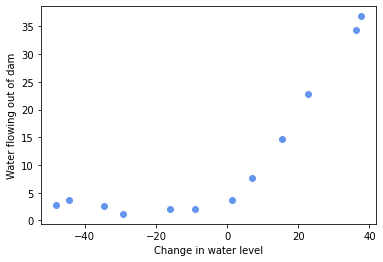

In [5]:
training_set_fig = plot_data(X, y)

### 1.2 Regularized linear regression cost function
Recall that regularized linear regression has the following cost function:
$$ J(\theta) = \frac{1}{2m} \left( \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right)^2 \right) + \frac{\lambda}{2m} \left( \sum_{j=1}^n \theta_j^2 \right)$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overall cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well.

In [6]:
def linearRegCostFunction(X, y, theta, lambda_):
    """
    Compute cost and gradient for regularized linear regression 
    with multiple variables. Computes the cost of using theta as
    the parameter for linear regression to fit the data points in X and y. 
    
    Parameters
    ----------
    X : array_like
        The dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        after adding the bias term.
    
    y : array_like
        The functions values at each datapoint. A vector of
        shape (m, ).
    
    theta : array_like
        The parameters for linear regression. A vector of shape (n+1,).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    J : float
        The computed cost function. 
    
    grad : array_like
        The value of the cost function gradient w.r.t theta. 
        A vector of shape (n+1, ).
    """
    
    # Initialize useful variables
    m = X.shape[0]
    grad = np.zeros(theta.shape[0])
    
    # Rehshape y to (m, ) maxtrix
    y = y.ravel()

    # -- Cost function -----#
    h = X.dot(theta) # hypothesis
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) # Unregularized cost function
    J_reg = (lambda_ / (2 * m)) * (theta[1:].T.dot(theta[1:])) # Regularization
    J += J_reg
    
    # -- gradient descent -----#
    grad = (1 / m) * ((h - y).dot(X))
    grad_reg = (lambda_ / m) * theta
    grad[1: ] += grad_reg[1: ]

    return J, grad

In [8]:
# Implementation of cost function
theta = np.ones(2)
J, grad = linearRegCostFunction(X, y, theta, 1)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192\n' % J)

Cost at theta = [1, 1]:	   303.993192 
This value should be about 303.993192



### 1.3 Regularized linear regression gradient

Correspondingly, the partial derivative of the cost function for regularized linear regression is defined as:
$$ \begin{align} \hfill \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \hfill \qquad \text{for } j = 0 \\ \hfill \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j \hfill \qquad \text{for } j \ge 1 \end{align} $$

`linearRegCostFunction` has the code for gradient. The gradient function using theta initialized at [1, 1] should be [-15.30, 598.250].

In [9]:
# Implementation of gradient descent
theta = np.ones(2)
J, grad = linearRegCostFunction(X, y, theta, 1)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-15.303016, 598.250744] 
 (this value should be about [-15.303016, 598.250744])



### 1.4 Fitting linear regression

In [12]:
def trainLinearReg(X, y, lambda_=0.0, maxiter=200):
    """
    Trains linear regression using scipy's optimize.minimize.
    Parameters
    ----------
    X : array_like
        The dataset with shape (m x n+1). 
        The bias term is assumed to be concatenated.
        
    y : array_like
        Function values at each datapoint. A vector of shape (m,).
        
    lambda_ : float, optional
        The regularization parameter.
        
    maxiter : int, optional
        Maximum number of iteration for the optimization algorithm.
        
    Returns
    -------
    theta : array_like
        The parameters for linear regression. This is a vector of shape (n+1,).
    """

    # Initialize important variables
    m = X.shape[0]
    initial_theta = np.zeros(X.shape[1])
    
    # Options
    options = {'maxiter': maxiter}
    
    # Short hand
    costFunction = lambda p: linearRegCostFunction(X, y, p, lambda_)
    
    # Minimize the cost function
    result = optimize.minimize(costFunction,
                               initial_theta,
                               jac=True,
                               method='TNC',
                               options=options)
    
    # Solutions
    theta = result.x
    
    return theta

In [13]:
# Train linear regression with lambda_ = 0
lambda_ = 0
theta = trainLinearReg(X, y, lambda_)

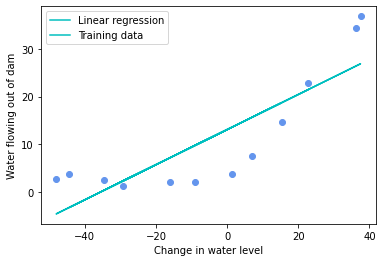

In [14]:
# Plot fit over the data
plt.scatter(X[:, 1: ], y, color='cornflowerblue')
plt.plot(X, theta[0] + theta[1] * X, 'c')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.legend(['Linear regression', 'Training data'])

## 2 Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

In this part of the exercise, I will plot training and test errors on a
learning curve to diagnose bias-variance problems.

### 2.1 Learning curves
To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, I will use different subsets of the original training set X. Specifically, for a training set size of $i$, I will use the first $i$ examples (i.e., X[:i, :] and y[:i]).

I will use the `trainLinearReg` function to find the $\theta$ parameters. Note that the lambda_ is passed as a parameter to the learningCurve function. After learning the $\theta$ parameters, I will compute the error on the training and cross validation sets. Recall that the training error for a dataset is defined as
$$ J_{\text{train}} = \frac{1}{2m} \left[ \sum_{i=1}^m \left(h_\theta \left( x^{(i)} \right) - y^{(i)} \right)^2 \right] $$

In particular, note that the training error does not include the regularization term. 

In [15]:
def learningCurve(X, y, X_val, y_val, lambda_=0):
    """
    Generates the train and cross validation set errors needed to plot a learning curve
    returns the train and cross validation set errors for a learning curve. 
    
    In this function, we will compute the train and test errors for
    dataset sizes from 1 up to m.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        after adding the bias term.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    X_val : array_like
        The validation dataset. Matrix with shape (m_val x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y_val : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    error_train : array_like
        A vector of shape m. error_train[i] contains the training error for
        i examples.
        
    error_val : array_like
        A vector of shape m. error_val[i] contains the validation error for
        i training examples.
    """
    
    # Initialize important variables
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(m):
        theta = trainLinearReg(X[:i+1, ], y[:i+1, ], lambda_)
        error_train[i], _ = linearRegCostFunction(X[:i+1, ],
                                                  y[:i+1, ],
                                                  theta, 0)
        error_val[i], _ = linearRegCostFunction(X_val,
                                                y_val,
                                                theta, 0)
    return error_train, error_val

In [16]:
error_train, error_val = learningCurve(X, y, X_val, y_val, lambda_)

Text(0.5, 1.0, 'Learning curve for linear regression')

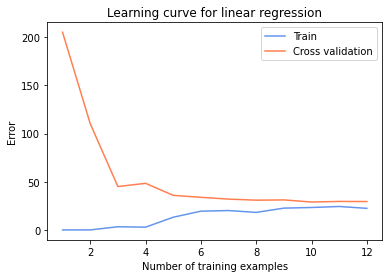

In [17]:
# Plot learning curve
plt.plot(list(range(1, X.shape[0]+1)), error_train, color='cornflowerblue', label='Train')
plt.plot(list(range(1, X.shape[0]+1)), error_val, color='coral', label='Cross validation')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Learning curve for linear regression')

## 3 Polynomial regression

The problem with our linear model was that it was too simple for the data
and resulted in underfitting (high bias). In this part of the exercise, I will address this problem by adding more features. For polynomial regression, our hypothesis has the form:
$$ \begin{align} h_\theta(x) \hfill = \theta_0 + \theta_1 \times (\text{waterLevel}) + \theta_2 \times (\text{waterLevel})^2 + \cdots + \theta_p \times (\text{waterLevel})^p \\ \hfill = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p \end{align} $$

Notice that by defining $x_1 = (\text{waterLevel})$, $x_2 = (\text{waterLevel})^2$ , $\cdots$, $x_p = (\text{waterLevel})^p$, we obtain a linear regression model where the features are the various powers of the original value (waterLevel).

In [18]:
def polyFeatures(X, p):
    """
    Maps X (1D vector) into the p-th power.
    
    Parameters
    ----------
    X : array_like
        A data vector of size m, where m is the number of examples.
    
    p : int
        The polynomial power to map the features. 
    
    Returns 
    -------
    X_poly : array_like
        A matrix of shape (m x p) where p is the polynomial 
        power and m is the number of examples. That is:
    
        X_poly[i, :] = [X[i], X[i]**2, X[i]**3 ...  X[i]**p]
    """
    
    # Initalize important variables
    m = X.shape[0]
    X_poly = np.zeros((m, p + 1))
    
    for i in range(p + 1):
        X_poly[:, i] = np.power(X[:, 1], i)
    
    return X_poly

In [19]:
p = 8
X_poly = polyFeatures(X, p)

### 3.1 Learning polynomial regression

I have completed the function `polyFeatures`, and I will proceed to train polynomial regression using the linear regression cost function. Before learning the parameters $\theta$ for the polynomial regression, I will first call `featureNormalize` and normalize the features of the training set, storing the `mu` and `sigma` parameters separately.

In [23]:
def featureNormalize(X):
    """
    Normalizes the features in X returns a normalized version of X 
    where the mean value of each feature is 0 and the standard deviation 
    is 1. This is often a good preprocessing step to do when working 
    with learning algorithms.
    
    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of 
        examples,and n is the number of dimensions for each example.
    
    Returns
    -------
    X_norm : array_like
        The normalized input dataset.
        
    mean : array_like
        A vector of size n corresponding to the mean for each 
        dimension across all examples.
        
    std : array_like
        A vector of size n corresponding to the standard deviations 
        for each dimension across all examples.
    """
        
    mean = np.mean(X, axis=0)
    std = X.std(axis=0, ddof=1)
    X_normalized = (X[:, 1:] - mean[1:]) / std[1:]
    
    return mean, std, X_normalized

In [24]:
# Feature normalize
mean, std, X_poly = featureNormalize(X_poly) 
X_poly = np.concatenate([np.ones((X_poly.shape[0], 1)), X_poly], axis=1)
print ('Normalized Training Example 1:')
print (X_poly[0, :])

Normalized Training Example 1:
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [25]:
# Map X_poly_test and normalize using mean and std
X_poly_test = polyFeatures(X_test, p)
X_poly_test = (X_poly_test[:, 1: ] - mean[1:]) / std[1: ]
X_poly_test = np.concatenate([np.ones((X_poly_test.shape[0], 1)), X_poly_test], axis=1)

In [26]:
# Map X_poly_val and normalize using mean and std
X_poly_val = polyFeatures(X_val, p)
X_poly_val = (X_poly_val[:, 1: ] - mean[1:]) / std[1: ]
X_poly_val = np.concatenate([np.ones((X_poly_val.shape[0], 1)), X_poly_val], axis=1)

Now, we will get to experiment with polynomial regression with multiple values of lambda. The code below runs polynomial regression with lambda = 0.

In [27]:
lambda_ = 0
theta = trainLinearReg(X_poly, y, lambda_)

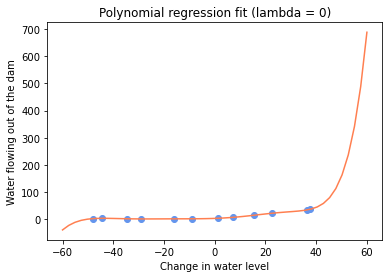

In [28]:
# Polynomial regression fit code

test_x_values = np.linspace(-60, 60, 50).reshape(50, 1)
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Calculate hypothesis function using theta
test_x_values = polyFeatures(test_x_values, p) # Change to polynomial features
test_x_values = (test_x_values[:, 1: ] - mean[1: ])/ std[1: ] # Feature normalize
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Compute hypothesis function with theta
test_y_values = test_x_values.dot(theta.T) 

# Plot hypothesis function
plt.scatter(X[:, 1: ], y, color='cornflowerblue')
plt.plot(np.linspace(-60, 60), test_y_values, color='coral')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Polynomial regression fit (lambda = {})'.format(lambda_))
plt.show()

The polynomial fit is able to follow the datapoints very well, thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

Text(0.5, 1.0, 'Polynomial regression learning curve (lambda = 0)')

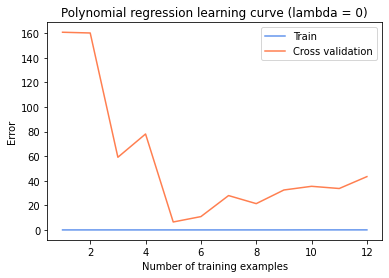

In [29]:
# Plotting the learning curve
error_train, error_val = learningCurve(X_poly,
                                       y,
                                       X_poly_val,
                                       y_val,
                                       lambda_)
# Plot learning over the data
plt.plot(list(range(1, X.shape[0]+1)), error_train, color='cornflowerblue', label='Train')
plt.plot(list(range(1, X.shape[0]+1)), error_val, color='coral', label='Cross validation')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Polynomial regression learning curve (lambda = {})'.format(lambda_))

To better understand the problems with the unregularized ($\lambda = 0$) model, we can see that the learning curve shows the same effect where the training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem.

### 3.2 Adjusting the regularization parameter
In this section, we will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. I have now modifoes the the lambda parameter and try $\lambda = 1, 100$. 

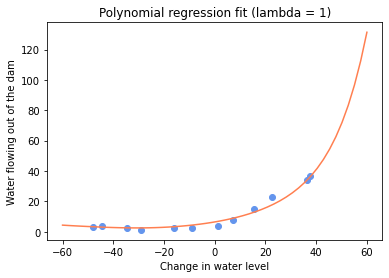

Text(0.5, 1.0, 'Polynomial regression learning curve (lambda = 1)')

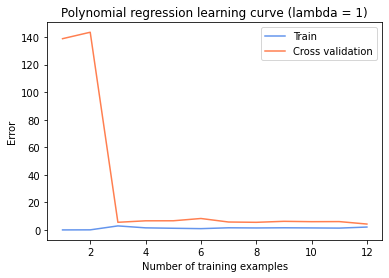

In [30]:
lambda_ = 1
theta = trainLinearReg(X_poly, y, lambda_)

# Polynomial regression fit code
test_x_values = np.linspace(-60, 60, 50).reshape(50, 1)
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Calculate hypothesis function using theta
test_x_values = polyFeatures(test_x_values, p) # Change to polynomial features
test_x_values = (test_x_values[:, 1: ] - mean[1: ])/ std[1: ] # Feature normalize
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Compute hypothesis function with theta
test_y_values = test_x_values.dot(theta.T) 

# Plot hypothesis function
plt.scatter(X[:, 1: ], y, color='cornflowerblue')
plt.plot(np.linspace(-60, 60), test_y_values, color='coral')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Polynomial regression fit (lambda = {})'.format(lambda_))
plt.show()

# Plotting the learning curve

error_train, error_val = learningCurve(X_poly,
                                       y,
                                       X_poly_val,
                                       y_val,
                                       lambda_)
# Plot learning over the data
plt.plot(list(range(1, X.shape[0]+1)), error_train, color='cornflowerblue', label='Train')
plt.plot(list(range(1, X.shape[0]+1)), error_val, color='coral', label='Cross validation')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Polynomial regression learning curve (lambda = {})'.format(lambda_))

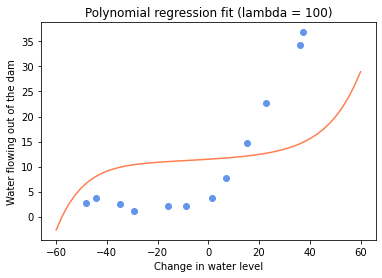

Text(0.5, 1.0, 'Polynomial regression learning curve (lambda = 100)')

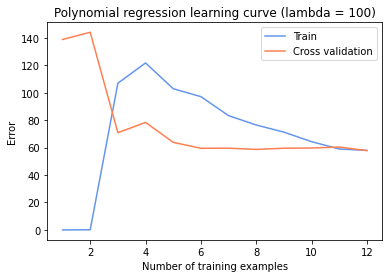

In [31]:
lambda_ = 100
theta = trainLinearReg(X_poly, y, lambda_)

# Polynomial regression fit code
test_x_values = np.linspace(-60, 60, 50).reshape(50, 1)
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Calculate hypothesis function using theta
test_x_values = polyFeatures(test_x_values, p) # Change to polynomial features
test_x_values = (test_x_values[:, 1: ] - mean[1: ])/ std[1: ] # Feature normalize
test_x_values = np.concatenate([np.ones((test_x_values.shape[0], 1)), test_x_values], axis=1)

# Compute hypothesis function with theta
test_y_values = test_x_values.dot(theta.T) 

# Plot hypothesis function
plt.scatter(X[:, 1: ], y, color='cornflowerblue')
plt.plot(np.linspace(-60, 60), test_y_values, color='coral')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Polynomial regression fit (lambda = {})'.format(lambda_))
plt.show()

# Plotting the learning curve

error_train, error_val = learningCurve(X_poly,
                                       y,
                                       X_poly_val,
                                       y_val,
                                       lambda_)
# Plot learning over the data
plt.plot(list(range(1, X.shape[0]+1)), error_train, color='cornflowerblue', label='Train')
plt.plot(list(range(1, X.shape[0]+1)), error_val, color='coral', label='Cross validation')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Polynomial regression learning curve (lambda = {})'.format(lambda_))

### 3.3 Selecting $\lambda$ using a cross validation set

In this section, I will implement an automated method to select the $\lambda$ parameter. Concretely, I will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

In [32]:
def validationCurve(X, y, X_val, y_val):
    """
    Generate the train and validation errors needed to plot a validation
    curve that we can use to select lambda_.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n) where m is the 
        total number of training examples, and n is the number of features 
        including any polynomial features.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    X_val : array_like
        The validation dataset. Matrix with shape (m_val x n) where m is the 
        total number of validation examples, and n is the number of features 
        including any polynomial features.
    
    y_val : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
        
    Returns
    -------
    lambda_vec : list
        The values of the regularization parameters which were used in 
        cross validation.
    
    error_train : list
        The training error computed at each value for the regularization
        parameter.
    
    error_val : list
        The validation error computed at each value for the regularization
        parameter.
    """
    
    # Selected values of lambda
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    
    # Containers for error values
    error_train = np.zeros((len(lambda_vec)))
    error_val = np.zeros((len(lambda_vec)))
    
    for index, lambda_ in enumerate(lambda_vec):
        theta = trainLinearReg(X, y, lambda_)
        error_train[index], _ = linearRegCostFunction(X, y, theta, 0)
        error_val[index], _ = linearRegCostFunction(X_val, y_val, theta, 0)
    
    return lambda_vec, error_train, error_val

lambda		Train error	Validation error
 0.000000	0.030390	43.330995
 0.001000	0.112846	9.896524
 0.003000	0.170943	16.401604
 0.010000	0.221463	16.944220
 0.030000	0.281863	12.828893
 0.100000	0.459317	7.587026
 0.300000	0.921782	4.636760
 1.000000	2.076199	4.260603
 3.000000	4.901373	3.822927
 10.000000	16.092273	9.945554


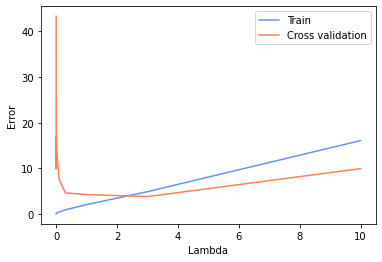

In [33]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, y_val)

# Plot error as a function of lambda
plt.plot(lambda_vec, error_train, color='cornflowerblue', label='Train')
plt.plot(lambda_vec, error_val, color='coral', label='Cross validation')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])

print('lambda\t\tTrain error\tValidation error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))

### 3.4 Computing test set error

I will now compute the test error using the best value of $\lambda$ we found. In our cross validation, we obtained a test error of 3.82 for $\lambda = 3$.

In [34]:
lambda_ = 3
theta = trainLinearReg(X_poly, y, lambda_) # Train model
error_test, _ = linearRegCostFunction(X_poly_test, y_test, theta, 0) # Calculate error for test set
print ('Test error: ')
print (f'{error_test:.5f}')

Test error: 
3.85991


### 3.5 Plotting learning curves with randomly selected examples

In [35]:
def learningCurveRand(X, y, X_val, y_val, lambda_):
    """
    Generates the train and cross validation set errors needed to plot a learning curve
    returns the train and cross validation set errors for a learning curve. 
    
    In this function, we will compute the train and test errors for
    dataset sizes from 1 up to m by randomly selecting examples.
    
    Parameters
    ----------
    X : array_like
        The training dataset. Matrix with shape (m x n + 1) where m is the 
        total number of examples, and n is the number of features 
        after adding the bias term.
    
    y : array_like
        The functions values at each training datapoint. A vector of
        shape (m, ).
    
    X_val : array_like
        The validation dataset. Matrix with shape (m_val x n + 1) where m is the 
        total number of examples, and n is the number of features 
        before adding the bias term.
    
    y_val : array_like
        The functions values at each validation datapoint. A vector of
        shape (m_val, ).
    
    lambda_ : float, optional
        The regularization parameter.
    
    Returns
    -------
    error_train : array_like
        A vector of shape m. error_train[i] contains the training error for
        i examples.
        
    error_val : array_like
        A vector of shape m. error_val[i] contains the validation error for
        i training examples.
    """
    
    # Initialize important variables
    m_train = X.shape[0]
    error_train = np.zeros((X.shape[0], 50))
    error_val = np.zeros((X.shape[0], 50))
    
    for j in range(50):
        for i in range(1, m_train + 1):
            train_index = np.random.choice(np.arange(0, m_train), i, replace=False)
            theta = trainLinearReg(X[train_index], y[train_index], lambda_) # Train model with selected points

            error_train[i-1, j], _ = linearRegCostFunction(X[train_index],
                                                           y[train_index],
                                                           theta, 0)
            error_val[i-1, j], _ = linearRegCostFunction(X_val,
                                                         y_val,
                                                         theta, 0)
    return np.mean(error_train, axis=1), np.mean(error_val, axis=1)

In [36]:
error_train, error_val = learningCurveRand(X_poly, y, X_poly_val, y_val, 0.01)

Text(0.5, 1.0, 'Learning curve for linear regression')

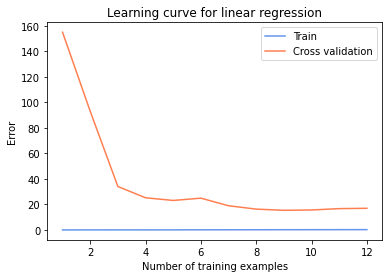

In [37]:
# Plot learning curve
plt.plot(list(range(1, X.shape[0]+1)), error_train, color='cornflowerblue', label='Train')
plt.plot(list(range(1, X.shape[0]+1)), error_val, color='coral', label='Cross validation')

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(['Train', 'Cross validation'])
plt.title('Learning curve for linear regression')